<a href="https://colab.research.google.com/github/Rich1220/Rich1220.github.io/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch #install pytorch

In [2]:
import torch

# file_path (on Google Cloud)
file_path = "/content/drive/MyDrive/Project/rcv1_train.binary"

# read the first 200 line and preprocess
data = []
labels = []
num_features = 47205  # 47205 features

with open(file_path, 'rt') as file:
    for i, line in enumerate(file):
        if i >= 200:  # only reads the first 200 lines
            break

        # tokens：label feature_index:feature_value feature_index:feature_value ...
        tokens = line.strip().split()
        label = int(tokens[0])  # extract the label
        labels.append(label)

        # create zero vector
        feature_vector = torch.zeros(num_features)

        # deal with sparse matrix
        for token in tokens[1:]:
            index, value = token.split(":")
            feature_index = int(index) - 1  # index-1
            feature_value = float(value)
            feature_vector[feature_index] = feature_value

        data.append(feature_vector)

# turn the data to pytorch manner
X = torch.stack(data)  # shpe：(200, 47205)
y = torch.tensor(labels)  # shape：(200,)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: torch.Size([200, 47205])
Labels shape: torch.Size([200])


In [6]:
import numpy as np


def sign(x): #define the sign
    return -1 if x <= 0 else 1

def PLA(X,y):
    """
    Implement Perceptron Learning Algorithm

    Parameters:
    X -- training data with shape (N,d)，N:sample number, d:feature number
    y -- label with shape (N)

    return:
    w -- final weight vector
    """

    N, d = X.shape  # smaple numbere: N & features number: d
    X_aug = np.hstack((np.ones((N, 1)), X))  # adding x0 to become X_aug
    w = np.zeros(d + 1)  # setting w with adding w0

    correct_counter = 0  # count the number of consecutive sample
    stop_correct_count = 5 * N  # stop consecutve number

    iteration = 0  # intitalize the iteration
    update = 0  # intitalize the update
    while correct_counter < stop_correct_count:
        # randome pick a sample （accept duplicated sample）
        i = np.random.randint(0, N)
        x_i = X_aug[i]  # selected x
        y_i = y[i].item()  # selected label
        # check if it is correct or not
        prediction = sign(np.dot(w, x_i))

        if prediction != y_i:  # classify wrong, update weight
            w += y_i * x_i
            update+=1
            correct_counter = 0  # reset the counter
        else:
            correct_counter += 1  # increment the counter

        iteration += 1

    print(f"Algorithm stopped after {iteration} iterations")
    print("update:",update)
    return w,update


In [8]:
Updates = []
Weights = []
for seeds in range(1000):
  print(seeds)
  np.random.seed(seeds) #setting random seed
  PLA_w,PLA_update = PLA(X,y)
  print(PLA_update)
  Updates.append(PLA_update)
Updates = np.array(Updates)


0
Algorithm stopped after 2461 iterations
update: 92
92
1
Algorithm stopped after 2253 iterations
update: 92
92
2
Algorithm stopped after 2588 iterations
update: 105
105
3
Algorithm stopped after 3046 iterations
update: 102
102
4
Algorithm stopped after 2528 iterations
update: 104
104
5
Algorithm stopped after 3092 iterations
update: 104
104
6
Algorithm stopped after 2725 iterations
update: 106
106
7
Algorithm stopped after 2573 iterations
update: 102
102
8
Algorithm stopped after 2086 iterations
update: 98
98
9
Algorithm stopped after 2788 iterations
update: 107
107
10
Algorithm stopped after 2250 iterations
update: 96
96
11
Algorithm stopped after 1961 iterations
update: 95
95
12
Algorithm stopped after 3175 iterations
update: 100
100
13
Algorithm stopped after 2246 iterations
update: 101
101
14
Algorithm stopped after 2304 iterations
update: 102
102
15
Algorithm stopped after 2529 iterations
update: 92
92
16
Algorithm stopped after 1971 iterations
update: 90
90
17
Algorithm stopped 

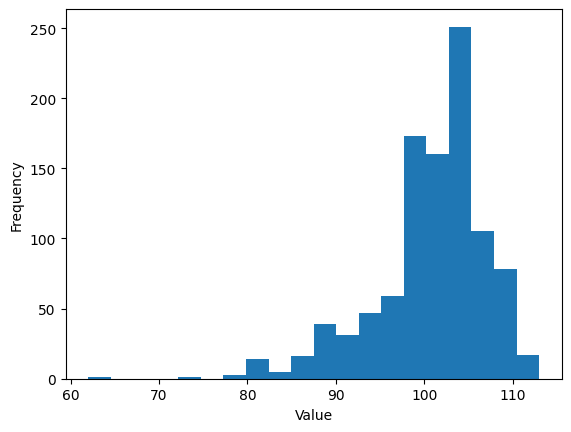

In [9]:
import matplotlib.pyplot as plt
plt.hist(Updates, bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
mean_all = np.mean(Updates)
print(f"Mean of all Update: {mean_all}")

Mean of all Update: 100.797


In [11]:
print(Updates)

[ 92  92 105 102 104 104 106 102  98 107  96  95 100 101 102  92  90 104
 103 105 100 100  94  96 102  96 105 103 108  97 109 107 101  94  96 108
 105 103 101  97 101 102 100 105  62 107 103 105 101 104  99 106 100 103
 107 107 100 111 108  92 104  97 105 109 100 102 103 100 104 107 101  96
 109 110  86  98 105 105 103  98 106 102  98 103 102 100 102 102  98 100
 103 104 110 110 103 102  97 105 100 102 103 100 105  94  98  98 101  98
 102  94 109 103 100 111  96  92 106  84 102  90 105 108 109 102 107 104
  86 105 104  96 109 105 106 102 109 104 100  84 102 104 108 102  99 103
  96 102  96 105 100  94 103  97 105 106 105 108  90 101  96  98 101  90
 103 104  92 100 104 106 108 100  96 103 100  90 100 103 107  96 102 103
 106 107 103 104 104 106 100  98 107  92 103 100 105  88  94  94 108 100
  97 108  88 105  96 103 111 104 107 107  96 103 105 101 108 101 109 110
 104  94 106 101  74 103 100 104  98 102  99  96 102  88 100 101 107 100
 103 105  86 109 101  88 103  90  94 105 101  99  8